In [1]:
from scripts.toxicity_analysis import *
from scripts.time_analysis import *
from scripts.highly_research_cancerprotein_affinities import *
from scripts.all_cancerprotein_affinities import *
from scripts.graphdata_cancer import *
from scripts.graphdata_for_gephi import *
from scripts.graph_visualizer import *
%load_ext autoreload
%autoreload 2


### TimeAnalysis

In [2]:
timetrends = TimeTrends()

95% CI for the probability of january publication:  [0.0998108  0.10582816]


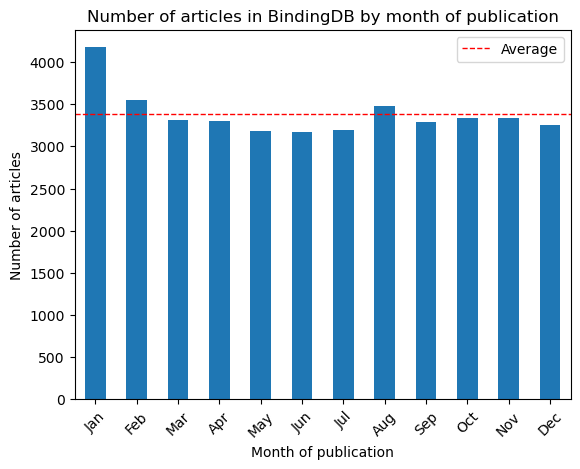

In [3]:
timetrends.visualize_monthly()

In [4]:
try:
    timetrends.visualize_chatgpt_confusion_matrix()
except Exception as e:
    print(e)


                Error: SWISSAI_API environment variable not set
                Please set your API on Linux by running:
                export SWISSAI_API='your-api-key'
                


In [5]:
years, publications = timetrends.get_year_publication()

In [6]:
years_stack, publication_stack = timetrends.stackplot_year_publication()

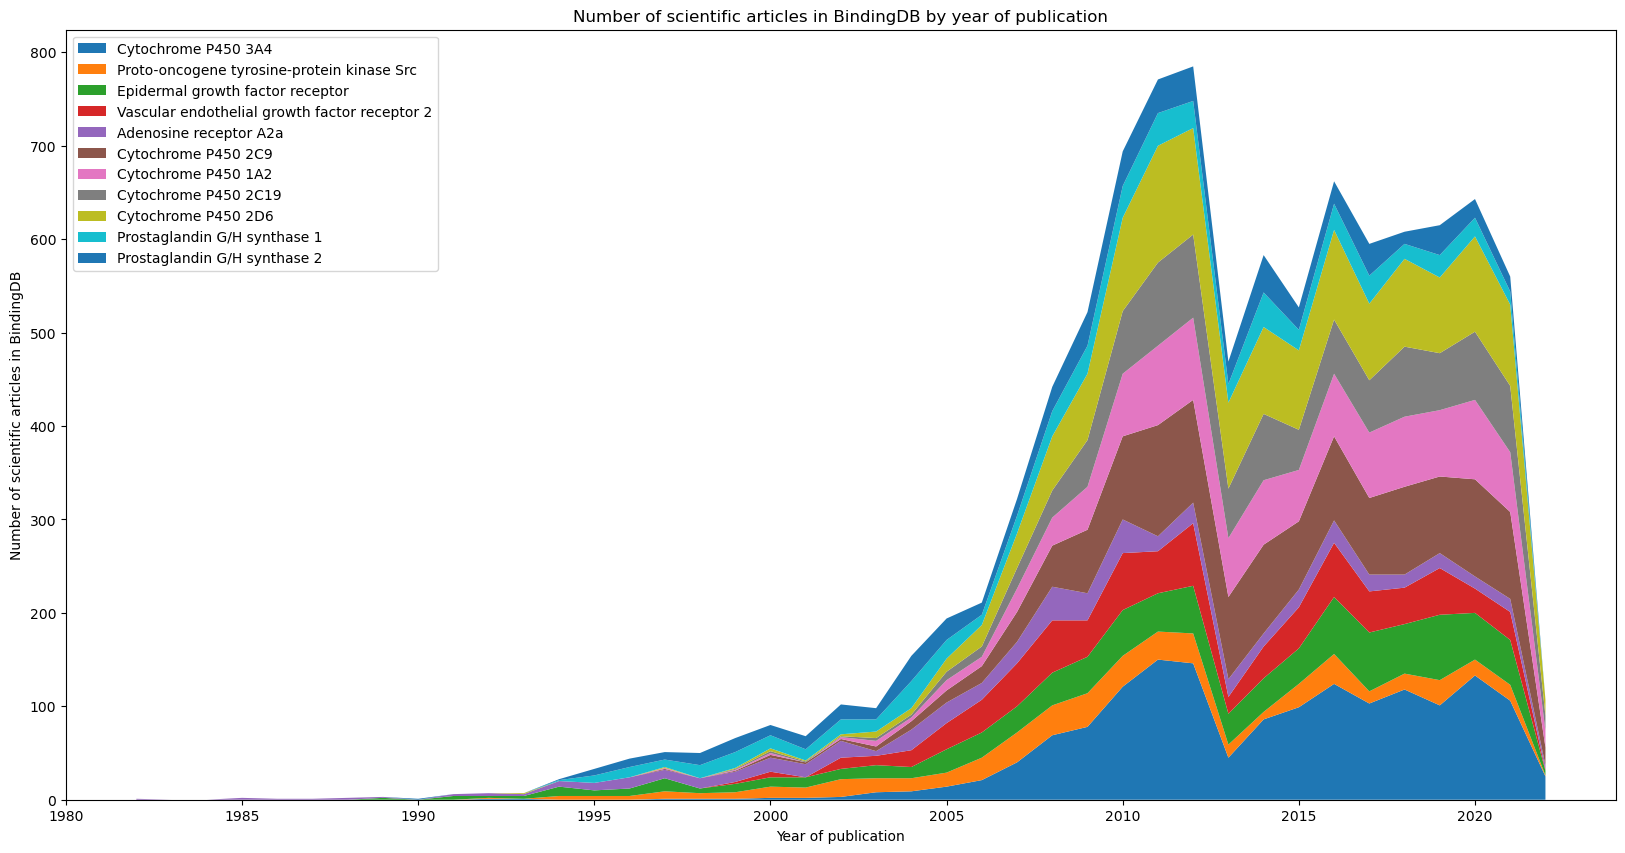

In [7]:
timetrends.stacked_line_plot()

### Toxicity Analysis

In [8]:
toxicity_analysis = ToxicityAnalysis()

/home/miki/epfl/ada_project/scripts/toxicity_analysis.py:162: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_report = BeautifulSoup(report, "html.parser").get_text()
/home/miki/epfl/ada_project/scripts/toxicity_analysis.py:162: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_report = BeautifulSoup(report, "html.parser").get_text()


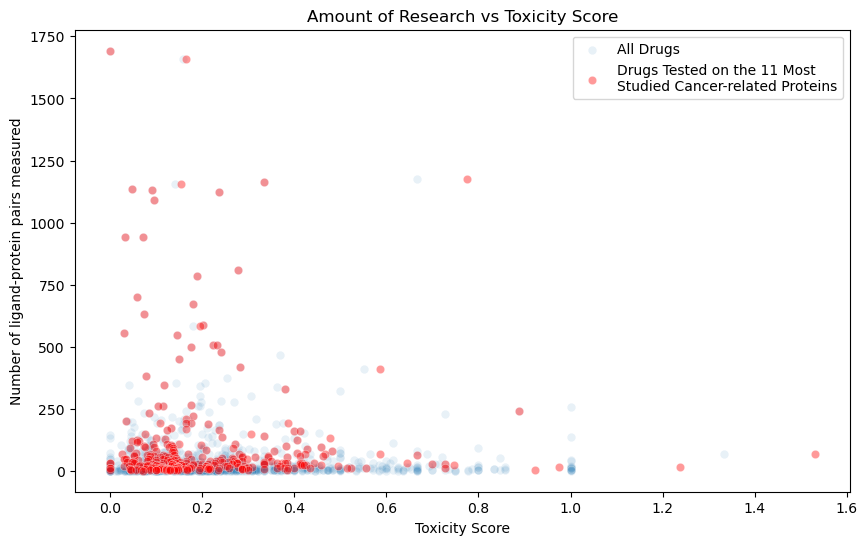

In [9]:
toxicity_analysis.plot_toxicity_vs_proteins()

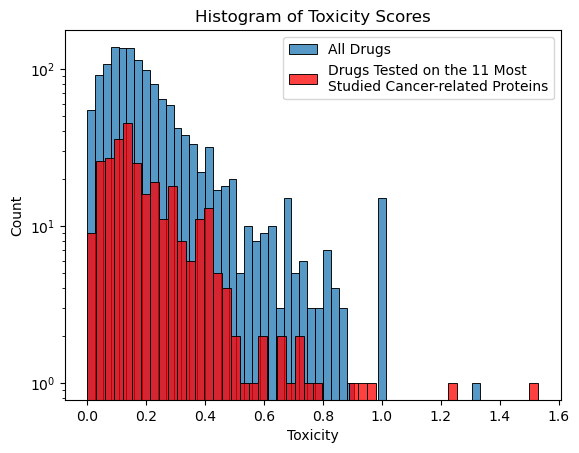

In [10]:
toxicity_analysis.plot_toxicity_scores()

### Binding affinity analysis

In [11]:
highly_researched = Highly_Research_Cancerprotein_Affinities()

In [12]:
highly_researched.get_colleration_mtx_values()

,ki,kd,ec50,ic50
ki,1.000000,0.112106,0.534585,0.978082
kd,0.112106,1.000000,0.965559,0.747552
ec50,0.534585,0.965559,1.000000,0.847668
ic50,0.978082,0.747552,0.847668,1.000000


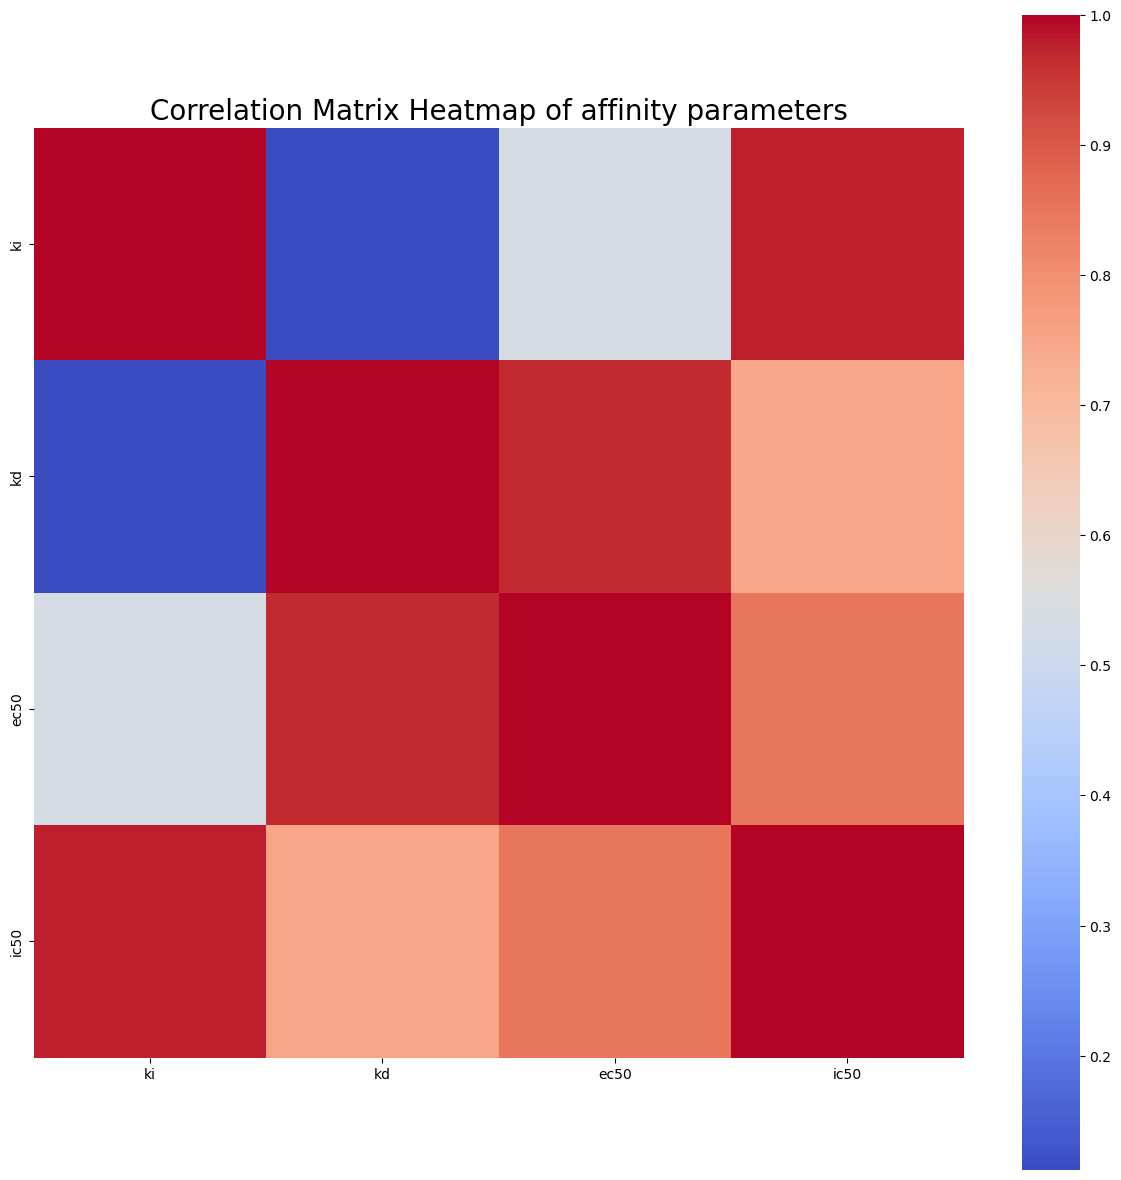

In [13]:
highly_researched.plot_binding_affinity_corr_mtx()

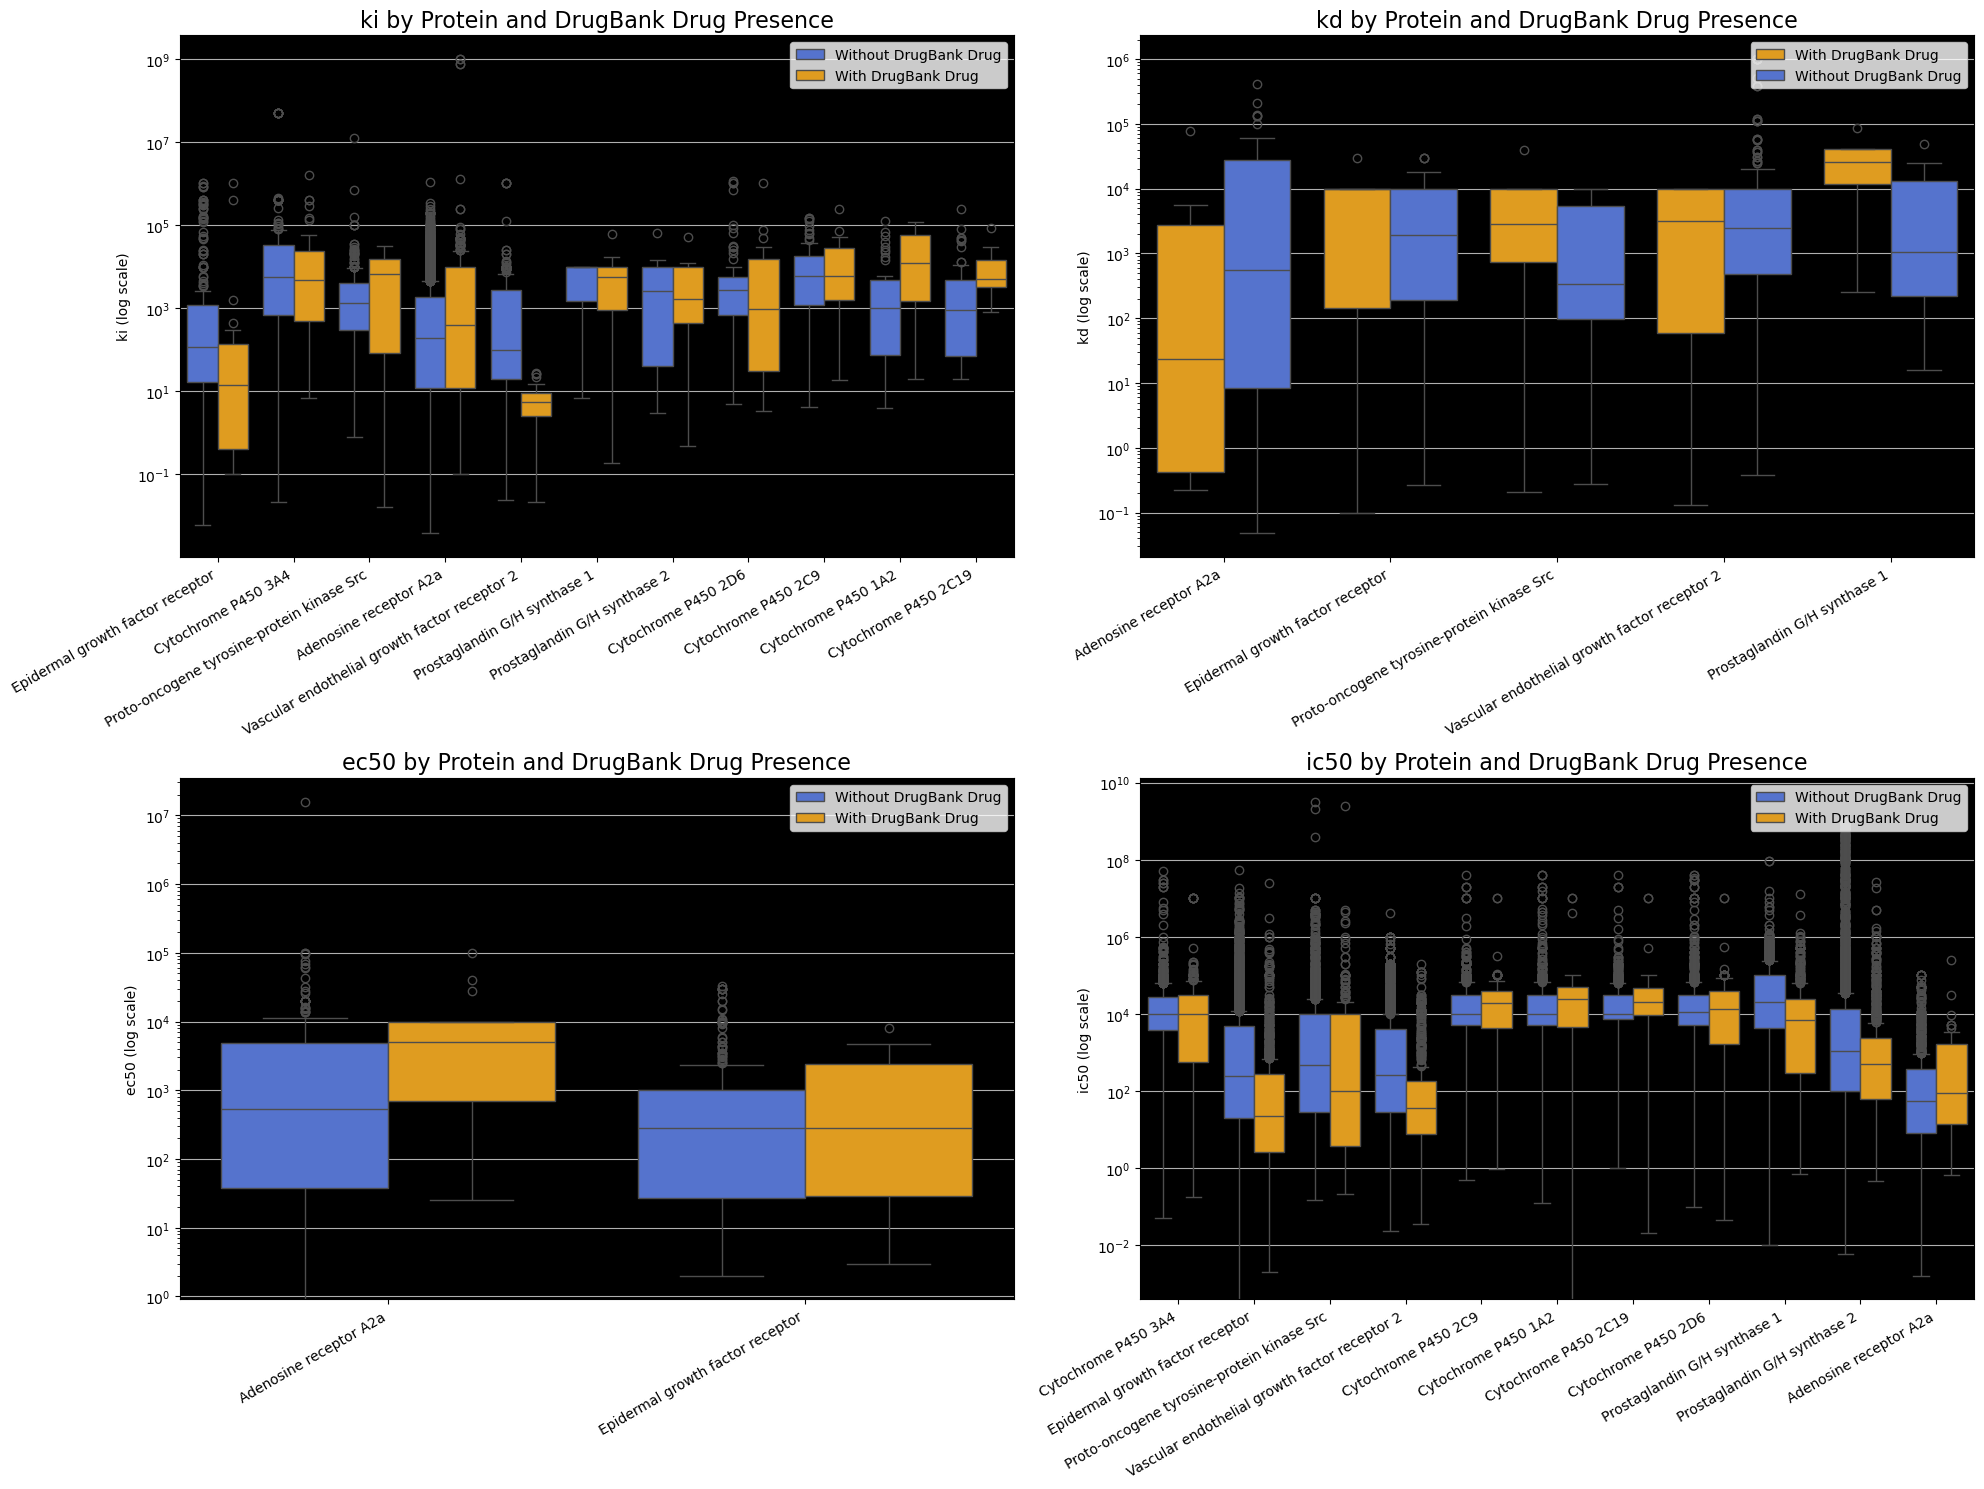

In [14]:
highly_researched.plot_binding_measurements_to_drug_presence(background_color='black')

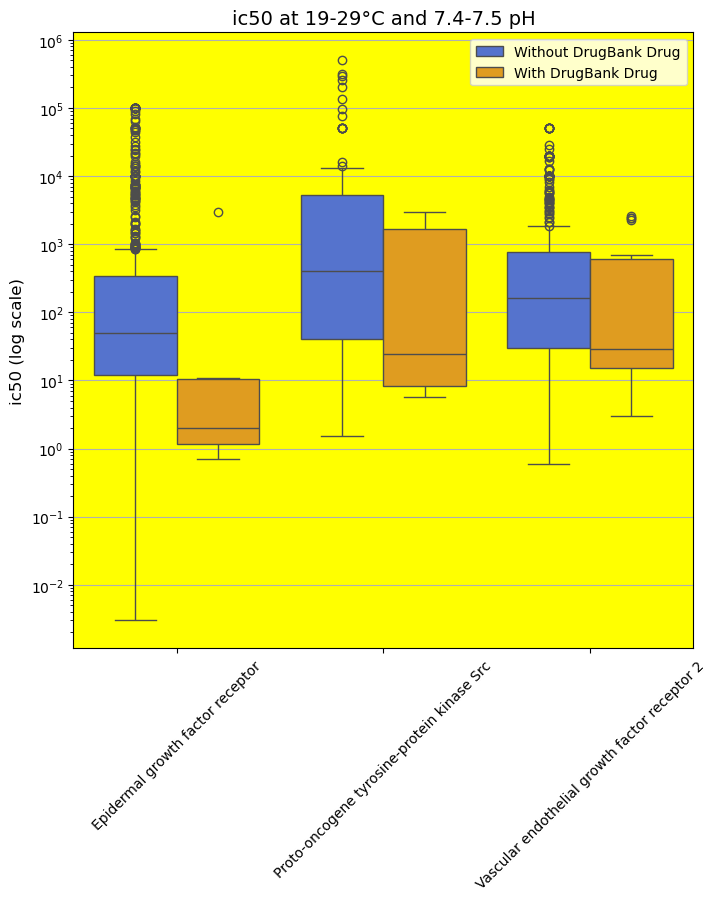

In [15]:
highly_researched.plot_measurement_in_different_conditions(col="ic50", background_color='yellow')

/home/miki/epfl/ada_project/scripts/utils/Chemical_analysis.py:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bootstrap_df = pd.concat([bootstrap_df, bootstrap_group_with_df, bootstrap_group_without_df], axis=0)


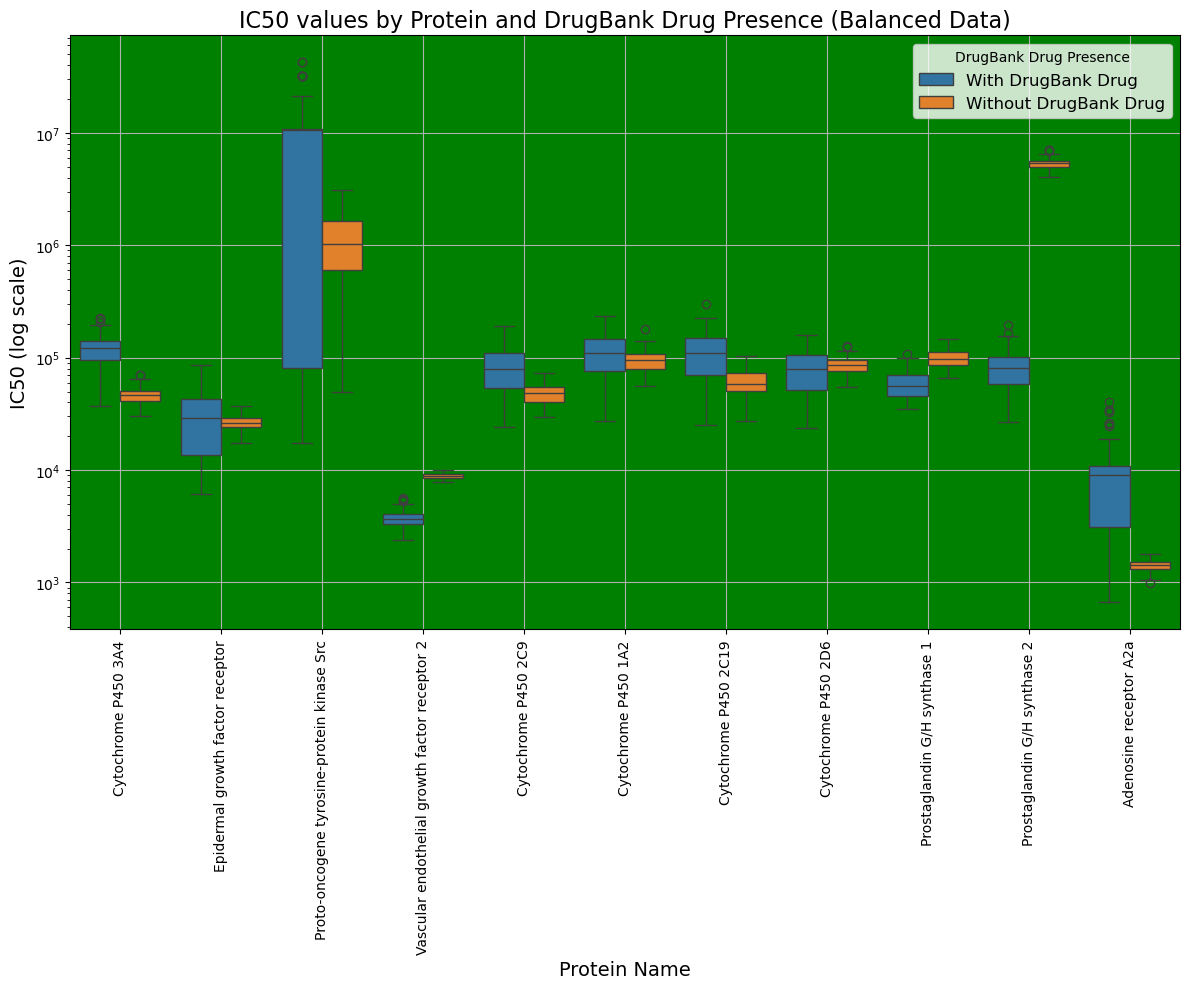

In [16]:
highly_researched.plot_measurement_by_protein_drug_presence(col="ic50", background_color='green')

In [17]:
cancer_related_affinities = All_Cancerprotein_Affinities()

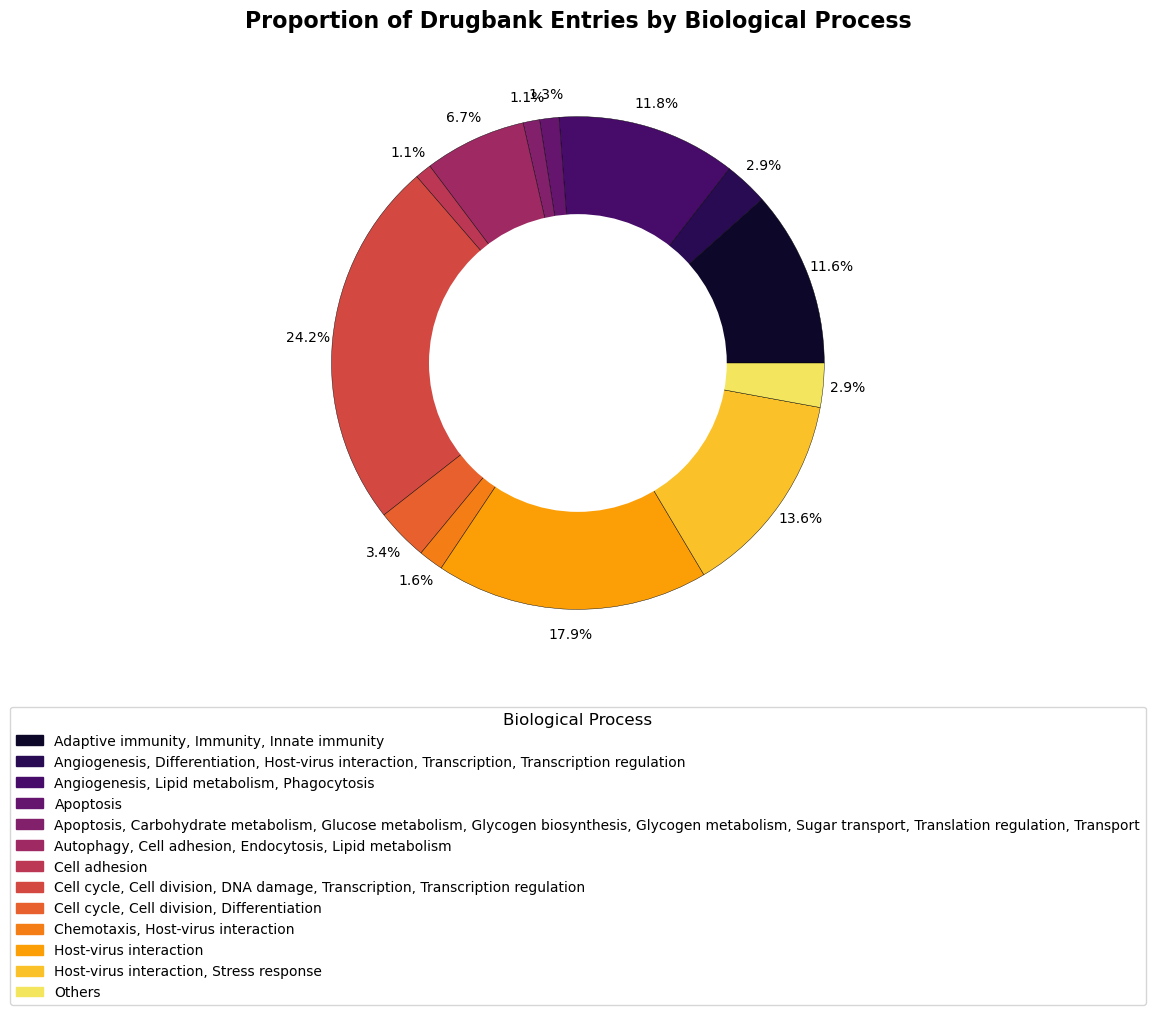

In [18]:
cancer_related_affinities.plot_proportion_of_drugs_per_biological_process()

In [19]:
## SEB: get the circe values
percentages, categories = cancer_related_affinities.get_circle_percentages_categories()

### Graph visualizing

##### Creating the data for cancer related graph visualization

In [20]:
cancer_creator = Graphdata_Cancer_Creator("cancer")

In [21]:
cancer_creator.create()

Data preprocessing
Creating graph data
Saving igraph object


##### Visualizing it then saving to graph_data/cancer...

In [22]:
graph_visualizer = Graph_Visualizer("cancer")

In [23]:
graph_visualizer.visualize()

##### Creating csv-s for Gephi

In [24]:
graph_data_creator = Graphdata_Gephi_Creator("all").create()

/home/miki/epfl/ada_project/scripts/graphdata_for_gephi.py:108: RuntimeWarning: divide by zero encountered in log
  weights = np.log(np.log(weights))
/home/miki/epfl/ada_project/scripts/graphdata_for_gephi.py:108: RuntimeWarning: invalid value encountered in log
  weights = np.log(np.log(weights))
